
## Data620 - Week 3 - Part2

###  Date : June 25, 2018
#### Prof: Alain Ledon
#### Authors : Dhananjay Kumar, Sang Yoon Hwang, Matheesha Thambeliyagodage, Santosh Manjrekar


What can you infer about the relationships between (1) the women, and (2) the social events?


In [38]:
import networkx as nx
import math
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import numpy as np
import operator
from pandasql import *
import pandas as pd
%matplotlib inline

In [25]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']


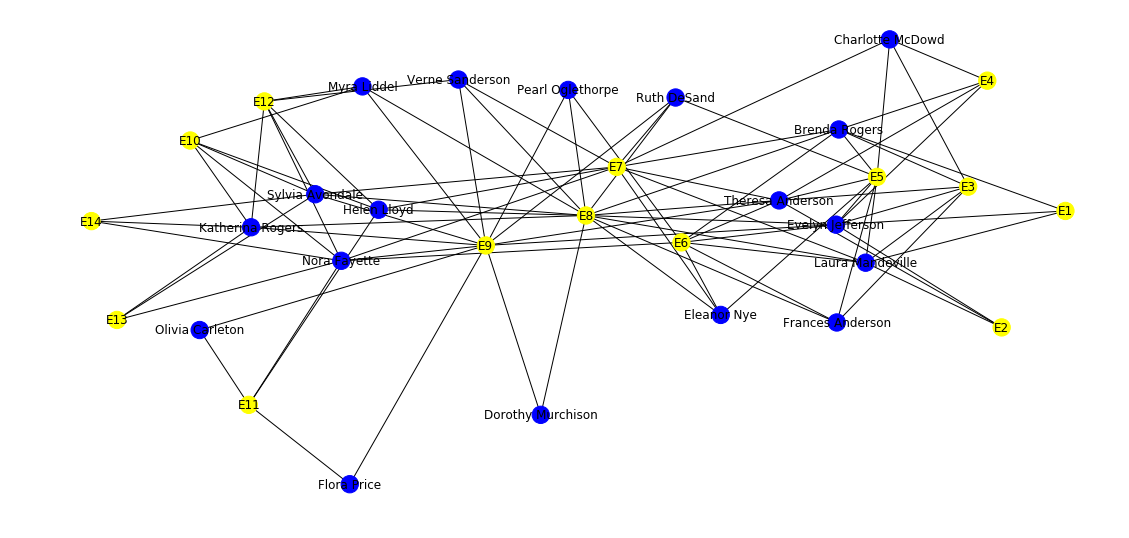

In [24]:
plt.figure(figsize=(15,7))
color_map = []
for node in G:
    if len(node) > 4:
        color_map.append('blue')
    else:
        color_map.append('yellow')       
plt.show(nx.draw(G,node_color=color_map,with_labels=True))

In [31]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [27]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [28]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [35]:
# Vital stats of G
print(nx.info(G))
print("Graph G is connected :",nx.is_connected(G))


Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625
Graph G is connected : True


In [36]:
# Distance Metric
print('center =', nx.center(G))
print('diameter =', nx.diameter(G))
print('radius =', nx.radius(G))

center = ['E9', 'Verne Sanderson', 'Theresa Anderson', 'Nora Fayette', 'Helen Lloyd', 'Ruth DeSand', 'Sylvia Avondale', 'Evelyn Jefferson', 'E8', 'E7', 'E6']
diameter = 4
radius = 3


In [39]:
# Closeness centrality
closeness = nx.closeness_centrality(G)
closeness = sorted(closeness.items(), key=operator.itemgetter(1))

In [51]:
clDf = pd.DataFrame(columns=['Node_Name', 'Closeness'], data=closeness)
clDf.sort_values(['Closeness'], ascending=False, inplace=True)

In [63]:
pysqldf = lambda q: sqldf(q, globals())

q = """
SELECT
*
FROM
 clDf
WHERE
 length(Node_Name) > 4;
"""


clDf2 = pysqldf(q)

In [66]:
q = """
SELECT
*
FROM
 clDf
WHERE
 length(Node_Name) < 4;
"""
clDf1 = pysqldf(q)

In [74]:
# top 10 Closeness - Woman - Event
resultclDf = pd.concat([clDf2, clDf1], axis=1)
resultclDf.head(17)

,Node_Name,Closeness,Node_Name,Closeness
0,Evelyn Jefferson,0.516667,E8,0.596154
1,Nora Fayette,0.516667,E9,0.553571
2,Theresa Anderson,0.516667,E7,0.516667
3,Sylvia Avondale,0.500000,E6,0.484375
4,Laura Mandeville,0.469697,E5,0.418919
5,Katherina Rogers,0.469697,E12,0.397436
6,Helen Lloyd,0.469697,E3,0.397436
7,Brenda Rogers,0.469697,E10,0.387500
8,Ruth DeSand,0.455882,E11,0.378049
9,Verne Sanderson,0.455882,E4,0.378049


In [75]:
betweenness = nx.betweenness_centrality(G)
betweenness = sorted(betweenness.items(), key=operator.itemgetter(1))
btDf = pd.DataFrame(columns=['Node_Name', 'Betweenness'], data=betweenness)
btDf.sort_values(['Betweenness'], ascending=False, inplace=True)
q = """
SELECT
*
FROM
 btDf
WHERE
 length(Node_Name) > 4;
"""
btDf1 = pysqldf(q)
q = """
SELECT
*
FROM
 btDf
WHERE
 length(Node_Name) < 4;
"""
btDf2 = pysqldf(q)
# Top 10 Betweenness - Woman - Event
resultbtDf = pd.concat([btDf1, btDf2], axis=1)
resultbtDf.head(17)

,Node_Name,Betweenness,Node_Name,Betweenness
0,Nora Fayette,0.108581,E8,0.237003
1,Evelyn Jefferson,0.092431,E9,0.219209
2,Theresa Anderson,0.083827,E7,0.125881
3,Sylvia Avondale,0.068625,E6,0.063199
4,Laura Mandeville,0.049149,E5,0.036641
5,Brenda Rogers,0.047358,E11,0.019116
6,Katherina Rogers,0.045326,E3,0.017715
7,Helen Lloyd,0.040564,E12,0.017588
8,Ruth DeSand,0.016061,E10,0.011122
9,Myra Liddel,0.015641,E4,0.007487


In [80]:
## Combined Output
resultDf = pd.concat([resultclDf, resultbtDf], axis=1)
resultDf.head(17)

,Node_Name,Closeness,Node_Name,Closeness,Node_Name,Betweenness,Node_Name,Betweenness
0,Evelyn Jefferson,0.516667,E8,0.596154,Nora Fayette,0.108581,E8,0.237003
1,Nora Fayette,0.516667,E9,0.553571,Evelyn Jefferson,0.092431,E9,0.219209
2,Theresa Anderson,0.516667,E7,0.516667,Theresa Anderson,0.083827,E7,0.125881
3,Sylvia Avondale,0.500000,E6,0.484375,Sylvia Avondale,0.068625,E6,0.063199
4,Laura Mandeville,0.469697,E5,0.418919,Laura Mandeville,0.049149,E5,0.036641
5,Katherina Rogers,0.469697,E12,0.397436,Brenda Rogers,0.047358,E11,0.019116
6,Helen Lloyd,0.469697,E3,0.397436,Katherina Rogers,0.045326,E3,0.017715
7,Brenda Rogers,0.469697,E10,0.387500,Helen Lloyd,0.040564,E12,0.017588
8,Ruth DeSand,0.455882,E11,0.378049,Ruth DeSand,0.016061,E10,0.011122
9,Verne Sanderson,0.455882,E4,0.378049,Myra Liddel,0.015641,E4,0.007487


In [76]:
# Distance Metric
print('center =', nx.center(G))

center = ['E9', 'Verne Sanderson', 'Theresa Anderson', 'Nora Fayette', 'Helen Lloyd', 'Ruth DeSand', 'Sylvia Avondale', 'Evelyn Jefferson', 'E8', 'E7', 'E6']


Taking into consideration the Closeness, the Betweenness and the Center centrality, it seems the Graph G is centered around Evelyn, Nora and Theresa and Events E9, E8 and E7. The same is visible visually when plotting graph based on the weight proportionate to the degree.

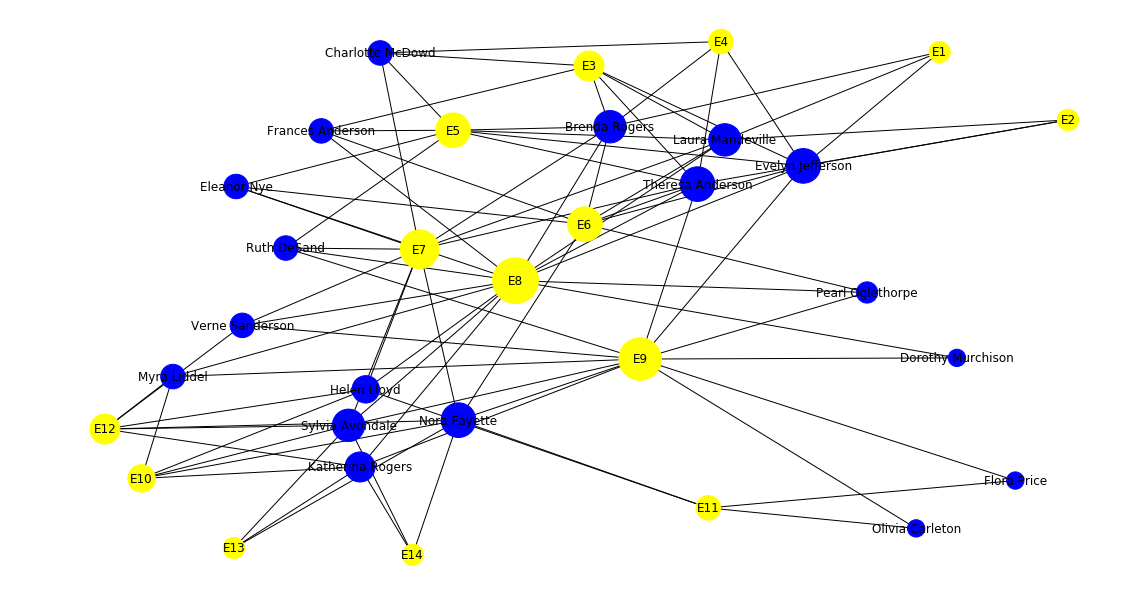

In [79]:
plt.figure(figsize=(15,8))
color_map = []
for node in G:
    if len(node) > 4:
        color_map.append('blue')
    else:
        color_map.append('yellow') 
deg = [val for (node, val) in G.degree()]        
plt.show(nx.draw(G,node_color=color_map,with_labels=True,node_size = [(v*150) for v in deg]))